<a href="https://colab.research.google.com/github/Khemapsorn/data_viz_2022/blob/main/sir_seir_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libralies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # พล็อตกราฟต่างๆ 

from scipy.integrate import odeint #Integrate a system of ordinary differential equations.
                                                # func(y, t0, ...) 

%config InlineBackend.figure_format = 'retina'

In [7]:
# SIR model
# Differential equation สมการเชิงอนุพันธ์
def deriv(y, t, N, beta, gamma): # ตัวแปร
    S, I, R = y
    dSdt =(-beta*S*I) / N
    dIdt = ((beta*S*I) / N) - gamma*I
    dRdt = gamma*I
    return dSdt, dIdt, dRdt

# กำหนดค่าต่าง ๆ (เตรียมข้อมูลแบบจำลอง)

In [18]:
# Number of population
N = 1000

# Time period (100 days)
t = np.arange(0,100,1)

# Initial number of infected and recoverd
I0 = 1
R0 = 0

#Initial susceptible to infection (Start with 1)
S0 = N - I0 - R0

# Set Beta and Gamma
beta = 2
gamma = 28

# Constant rate beta and gamma rates
b = 1 / beta
g = 1 / gamma

#Integration SIR model
simulationresult = odeint(deriv, (S0, I0, R0), t, args = (N,b,g))

#Summary
simulationResult = pd.DataFrame(simulationresult, columns = ['Susceptible', 'Infectious','Recovery'])
simulationResult = simulationResult.astype(np.int32)



# พล็อตแบบจำลอง

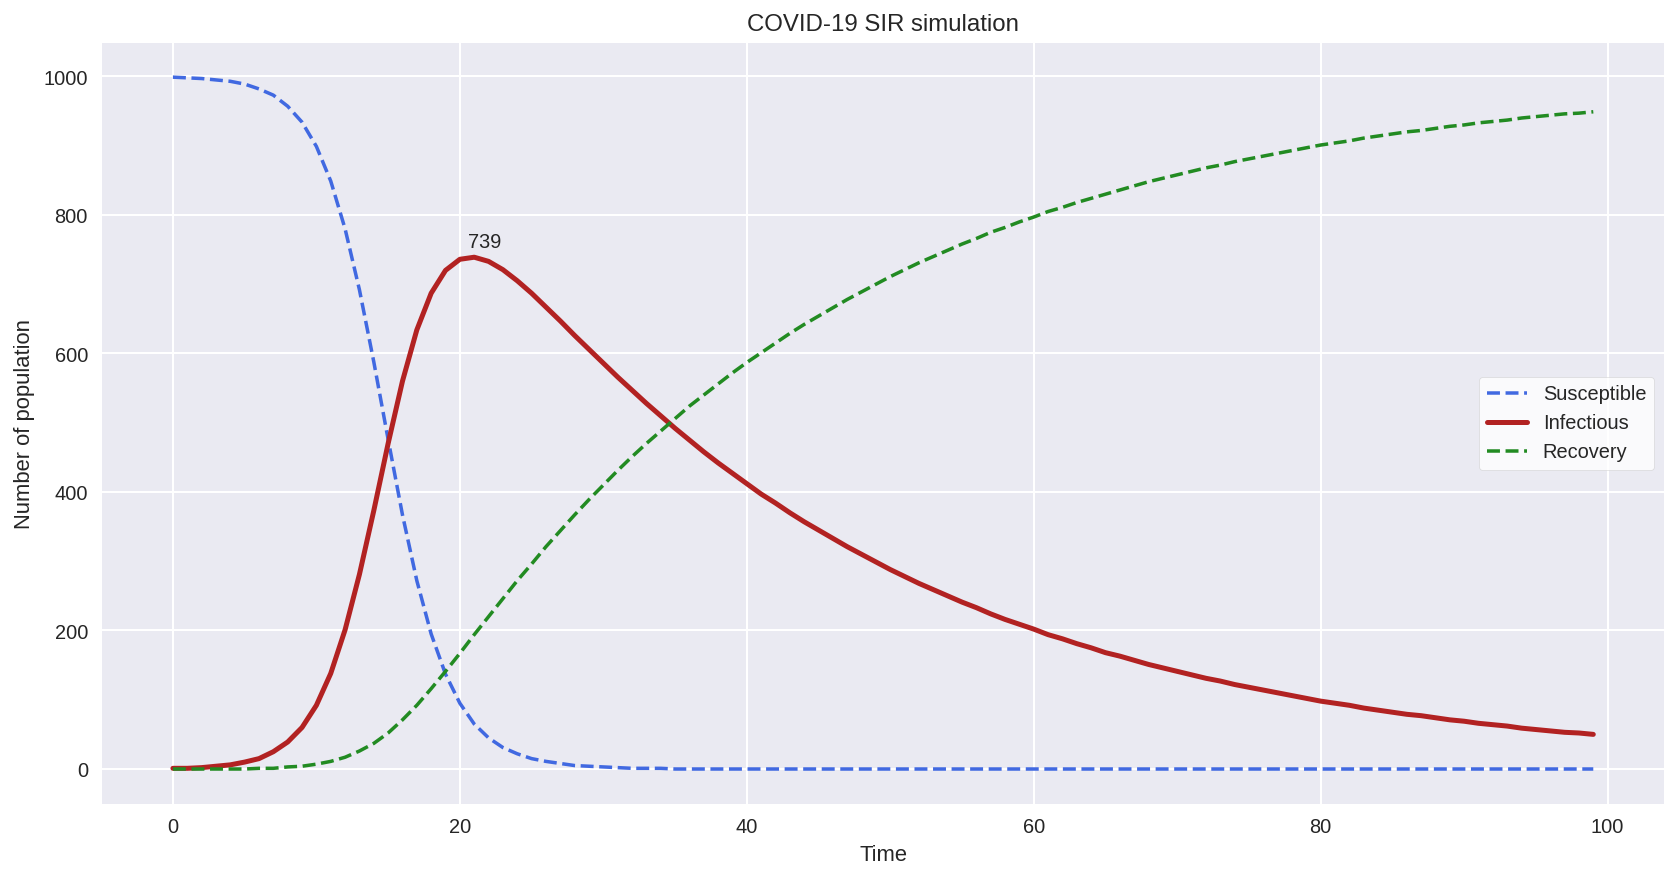

In [24]:
# plot the simulation
plt.figure (figsize = (14, 7)) #กำหนดขนาด
with plt.style.context('seaborn'): # พล็อตเนื้อหา สไตล์ต่าง ๆ
    plt.title('COVID-19 SIR simulation') # ชื่อกราฟ
    plt.xlabel('Time') # แกน X
    plt.ylabel('Number of population') # แกน Y
    plt.plot(simulationResult['Susceptible'], c = 'royalblue', linestyle = '--',label = 'Susceptible') # S
    plt.plot(simulationResult['Infectious'], c = 'firebrick', linewidth = 2.5,label = 'Infectious') #I
    plt.plot(simulationResult['Recovery'], c = 'forestgreen', linestyle = '--' ,label = 'Recovery') # R
    plt.annotate(simulationResult['Infectious'].max(),
                    (simulationResult['Infectious'].idxmax(), simulationResult['Infectious'].max()),
                    textcoords = 'offset points', xytext = (5,5),ha = 'center')
    plt.legend(frameon = True, facecolor = 'white') # โชว์เส้นกริด ทำเป็นสีขาว
    plt.show()